In [1]:
import pandas as pd
import numpy as np
import importlib
import Tools, EM

[0 0]
[ 0.7 -0.1]
[0.05 0.05]


/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

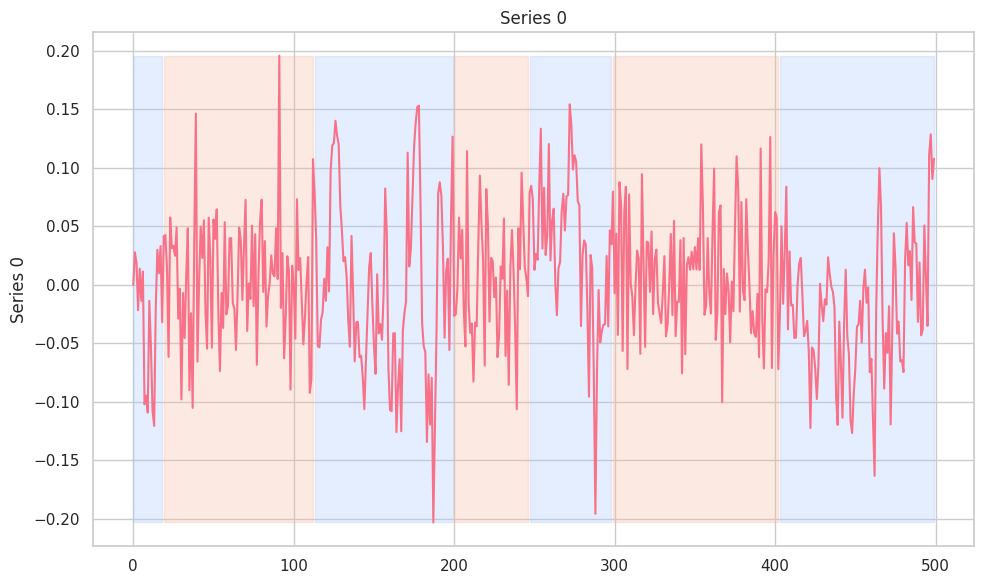

In [4]:
from importlib import reload
reload(Tools)

from Tools import AR
from importlib import reload
reload(EM)
from EM import AREM

sim = AR(n_states=2, num_obs=500, num_series = 1,transition_diagonal=0.99,deterministic=True, mu=[0,0], phi=[0.7, -0.1],sigma=[0.05, 0.05])
print(sim.mu)
print(sim.phi)
print(sim.sigmas)
sim.simulate()


sim.plot_simulation(separate=True, cum=False)

In [5]:
from importlib import reload
reload(Tools)

from Tools import AR
from importlib import reload
reload(EM)
from EM import AREM
model = AREM(sim.data,max_iterations=50)
# model.fit()
model.fit()


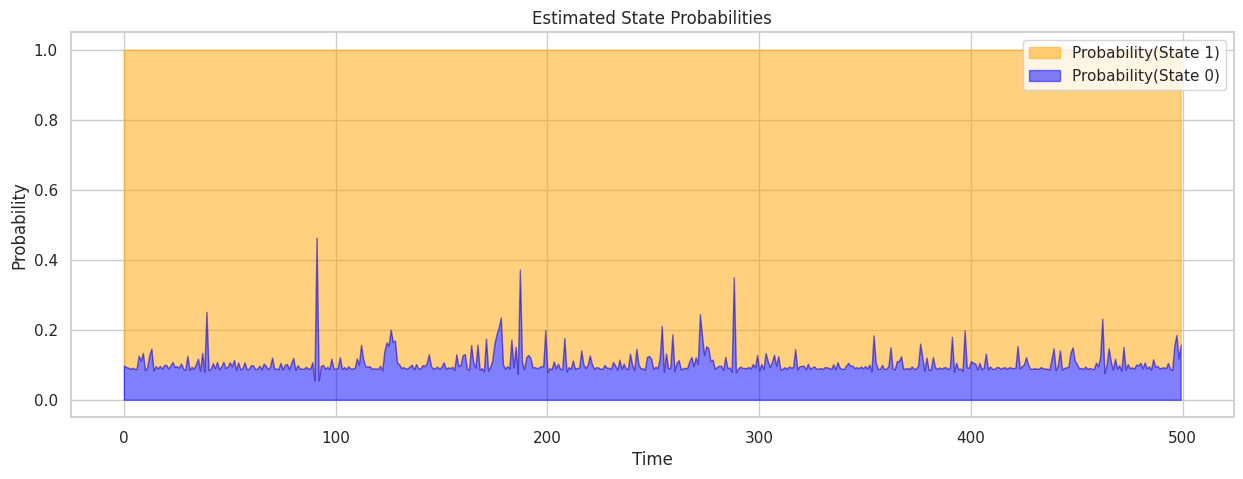

/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

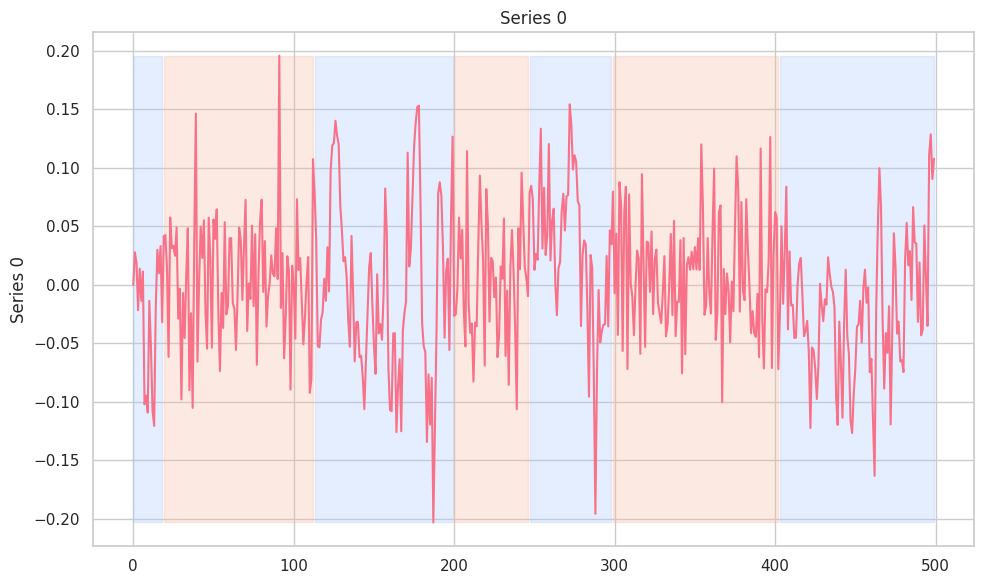

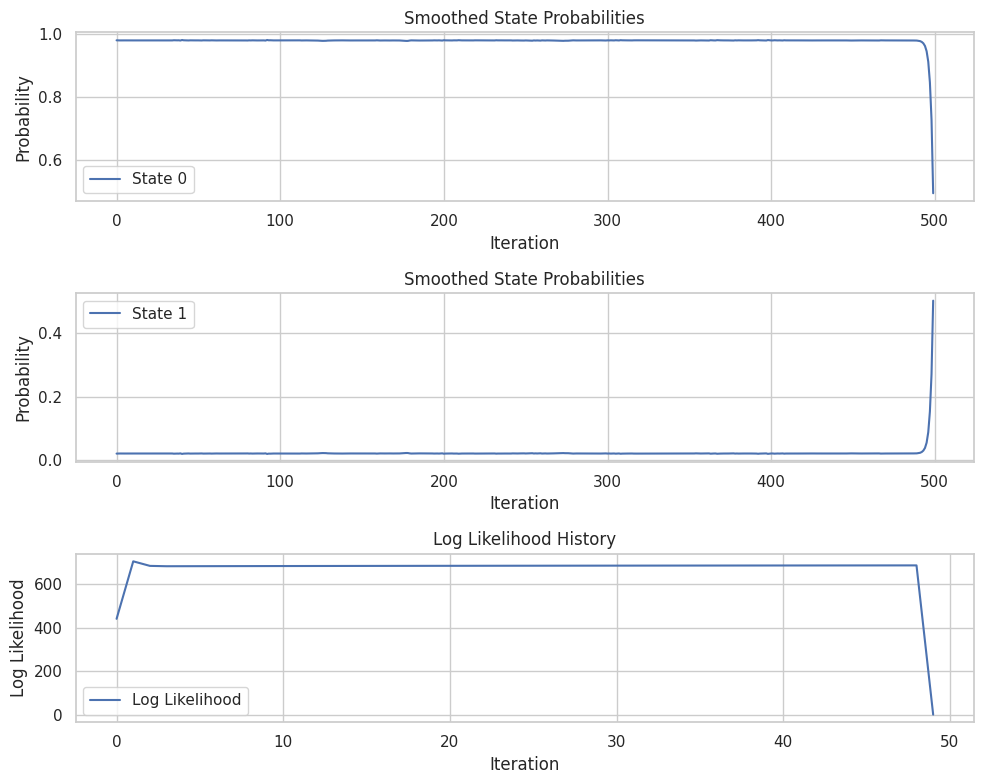

In [7]:
from hmmlearn import hmm
import matplotlib.pyplot as plt
# Assuming sim.data is your dataset, a NumPy array
# sim.data = np.column_stack([your_data_here])

# Define the model
model1 = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000, random_state=42)

# Fit the model
model1.fit(sim.data)

# Predict hidden states
hidden_states = model1.predict(sim.data)

# Predict state membership probabilities
state_probabilities = model1.predict_proba(sim.data)

# Plotting
plt.figure(figsize=(15, 5))

# State 1 probabilities on top
plt.fill_between(np.arange(len(sim.data)), 1, state_probabilities[:, 1], color="orange", alpha=0.5, label="Probability(State 1)")

# State 0 probabilities on the bottom (1 - Probability(State 1))
plt.fill_between(np.arange(len(sim.data)), 0,  state_probabilities[:, 1], color="blue", alpha=0.5, label="Probability(State 0)")

plt.title("Estimated State Probabilities")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Generate example data for the smoothed_state_probabilities and log_likelihood_histories for demonstration
sim.plot_simulation(separate=True, cum=False)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Smoothed State Probabilities

axes[0].plot(model.smoothed_state_probabilities[0, :], label=f'State {0}')
axes[0].set_title('Smoothed State Probabilities')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Probability')
axes[0].legend()
axes[1].plot(model.smoothed_state_probabilities[1, :], label=f'State {1}')
axes[1].set_title('Smoothed State Probabilities')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Probability')
axes[1].legend()
# Log Likelihood Histories
axes[2].plot(model.log_likelihood_histories, label='Log Likelihood')
axes[2].set_title('Log Likelihood History')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Log Likelihood')
axes[2].legend()

plt.tight_layout()
plt.show()


In [ ]:

# # Assuming some example data for demonstration; replace these with your actual data

# import matplotlib.pyplot as plt

# import numpy as np



# plt.plot(model.mu_histories[ :, 0], label=f'State {0}')
# plt.plot(model.mu_histories[ :, 1], label=f'State {1}')
# plt.show()
# plt.plot(model.phi_histories[ :, 0], label=f'State {0}')
# plt.plot(model.phi_histories[ :, 1], label=f'State {1}')
# plt.show()


# plt.plot(model.sigma_histories[ :, 0], label=f'State {0}')
# plt.plot(model.sigma_histories[ :, 1], label=f'State {1}')
# plt.show()



# # Markov Histories

# plt.plot(model.markov_histories[:, 0], label=f'State {0}')



# plt.show()

# plt.plot(model.markov_histories[:, 1], label=f'State {1}')
# plt.show()


In [ ]:
print(f'The Simulation Values of mu {sim.mu}, and the Estimated Values: {model.mu}')
print(f'The Simulation Values of phi {sim.phi}, and the Estimated Values: {model.phi}')
print(f'The Simulation Values of sigma {sim.sigmas}, and the Estimated Values: {model.sigma}')


In [ ]:
np.var(sim.data)